# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Problem Statement:
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the datasets given
train = pd.read_csv(r'C:\Users\invra\Downloads\termdeposit_train - termdeposit_train.csv')
test = pd.read_csv(r'C:\Users\invra\Downloads\termdeposit_test - termdeposit_test.csv')

In [6]:
train.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
test.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [8]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Columns in the both tables are same, except Subscribed in the first dataset i.e train

so our tarrget variable is Subscribed column

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [12]:
train.shape

(31647, 18)

There are 31647 rows and 18 columns of data in the train dataset

In [13]:
test.shape

(13564, 17)

There are 13564 rows and 17 columns of data in test data set

One missing column in the test dataset is due to Subscribed column

# EDA

In [14]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [65]:
train.duplicated().any()

False

No duplicate rows present

<AxesSubplot:>

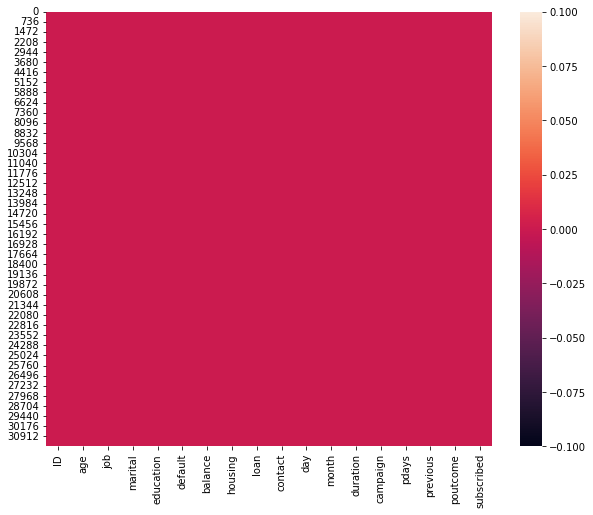

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull())

There are no null values in the train dataset

In [18]:
#checking for missing values in train dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<AxesSubplot:>

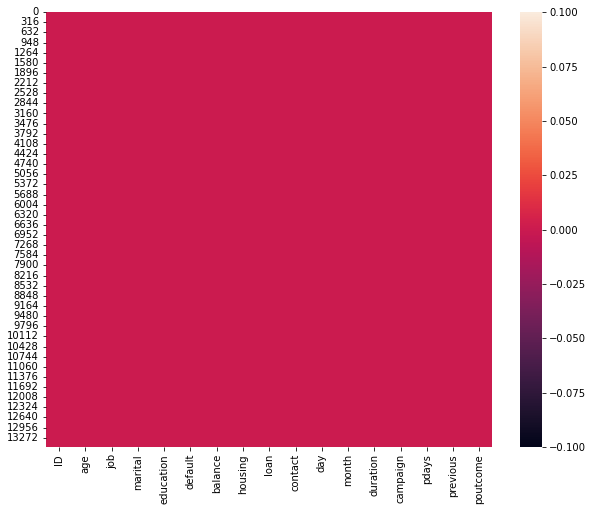

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(test.isnull())

Test dataset is also not having any null values

In [39]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
train["ID"].nunique()

31647

In [44]:
train["age"].nunique()

76

In [43]:
train["age"].unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

In [45]:
train["job"].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [47]:
train["education"].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [48]:
train["default"].unique()

array(['no', 'yes'], dtype=object)

In [49]:
train["housing"].unique()

array(['no', 'yes'], dtype=object)

In [51]:
train["contact"].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [50]:
train["loan"].unique()

array(['no', 'yes'], dtype=object)

In [52]:
train["month"].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [46]:
train["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [53]:
train["poutcome"].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

# Visualisation

<AxesSubplot:xlabel='subscribed', ylabel='count'>

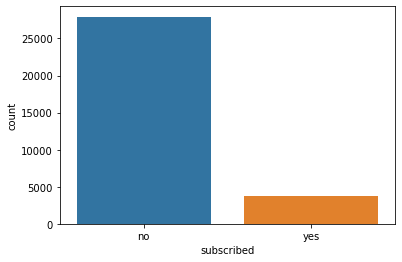

In [21]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()
sns.countplot(data=train, x='subscribed')

In [22]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%.

In [23]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

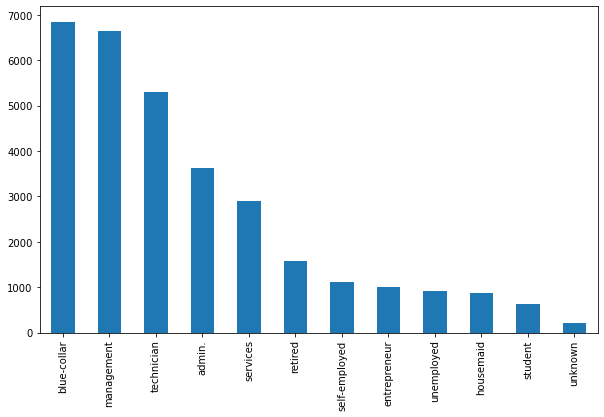

In [24]:
train['job'].value_counts().plot(kind='bar', figsize=(10,6))

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

<AxesSubplot:xlabel='age', ylabel='Density'>

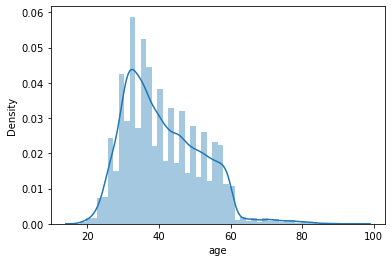

In [25]:
sns.distplot(train['age'])

We can see that most of the customers fall in the age group between 20-60.

In [26]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

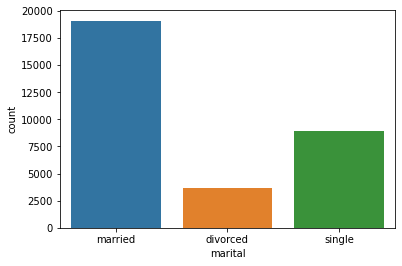

In [27]:
sns.countplot(data=train, x='marital');

Most of the customers are married

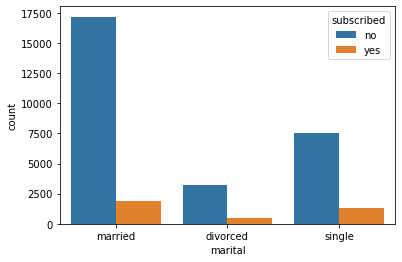

In [28]:
sns.countplot(data=train, x='marital', hue='subscribed');

From this it shows among all customers subscribed customers are very less and married people are on little higher side in case of subsciptions

In [29]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [30]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

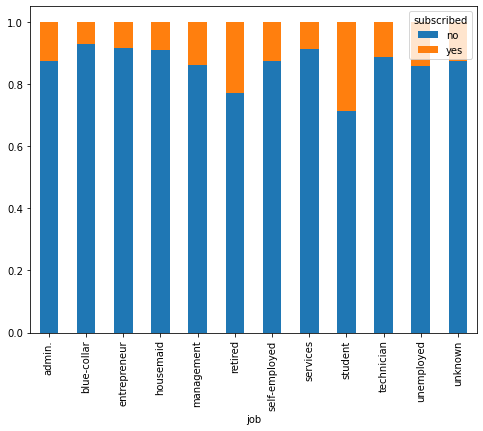

In [31]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

Stuents and retired people are most subscribed in the above data, 

among both students are high, but generally students tends to be low as they dont have income.

This may be due to the student population, which is very less compred to all the other professions

In [32]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [33]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


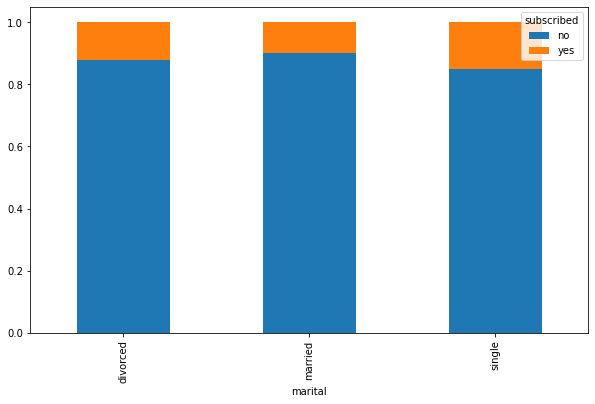

In [34]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

From the above graph its hardly 15% population subscribed for the term deposit, which is almost equal in all categories that is married, divorced, single

In [35]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [37]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<AxesSubplot:xlabel='default'>

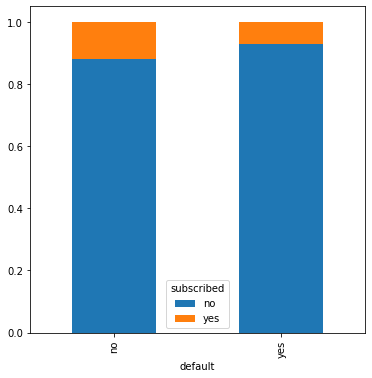

In [38]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

In [58]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

We can see that customers having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [59]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Fromm above data we can see that the data has outliers as Max and 75% has huge differences in Balance, Duration,Campaign,pdays, previous columns

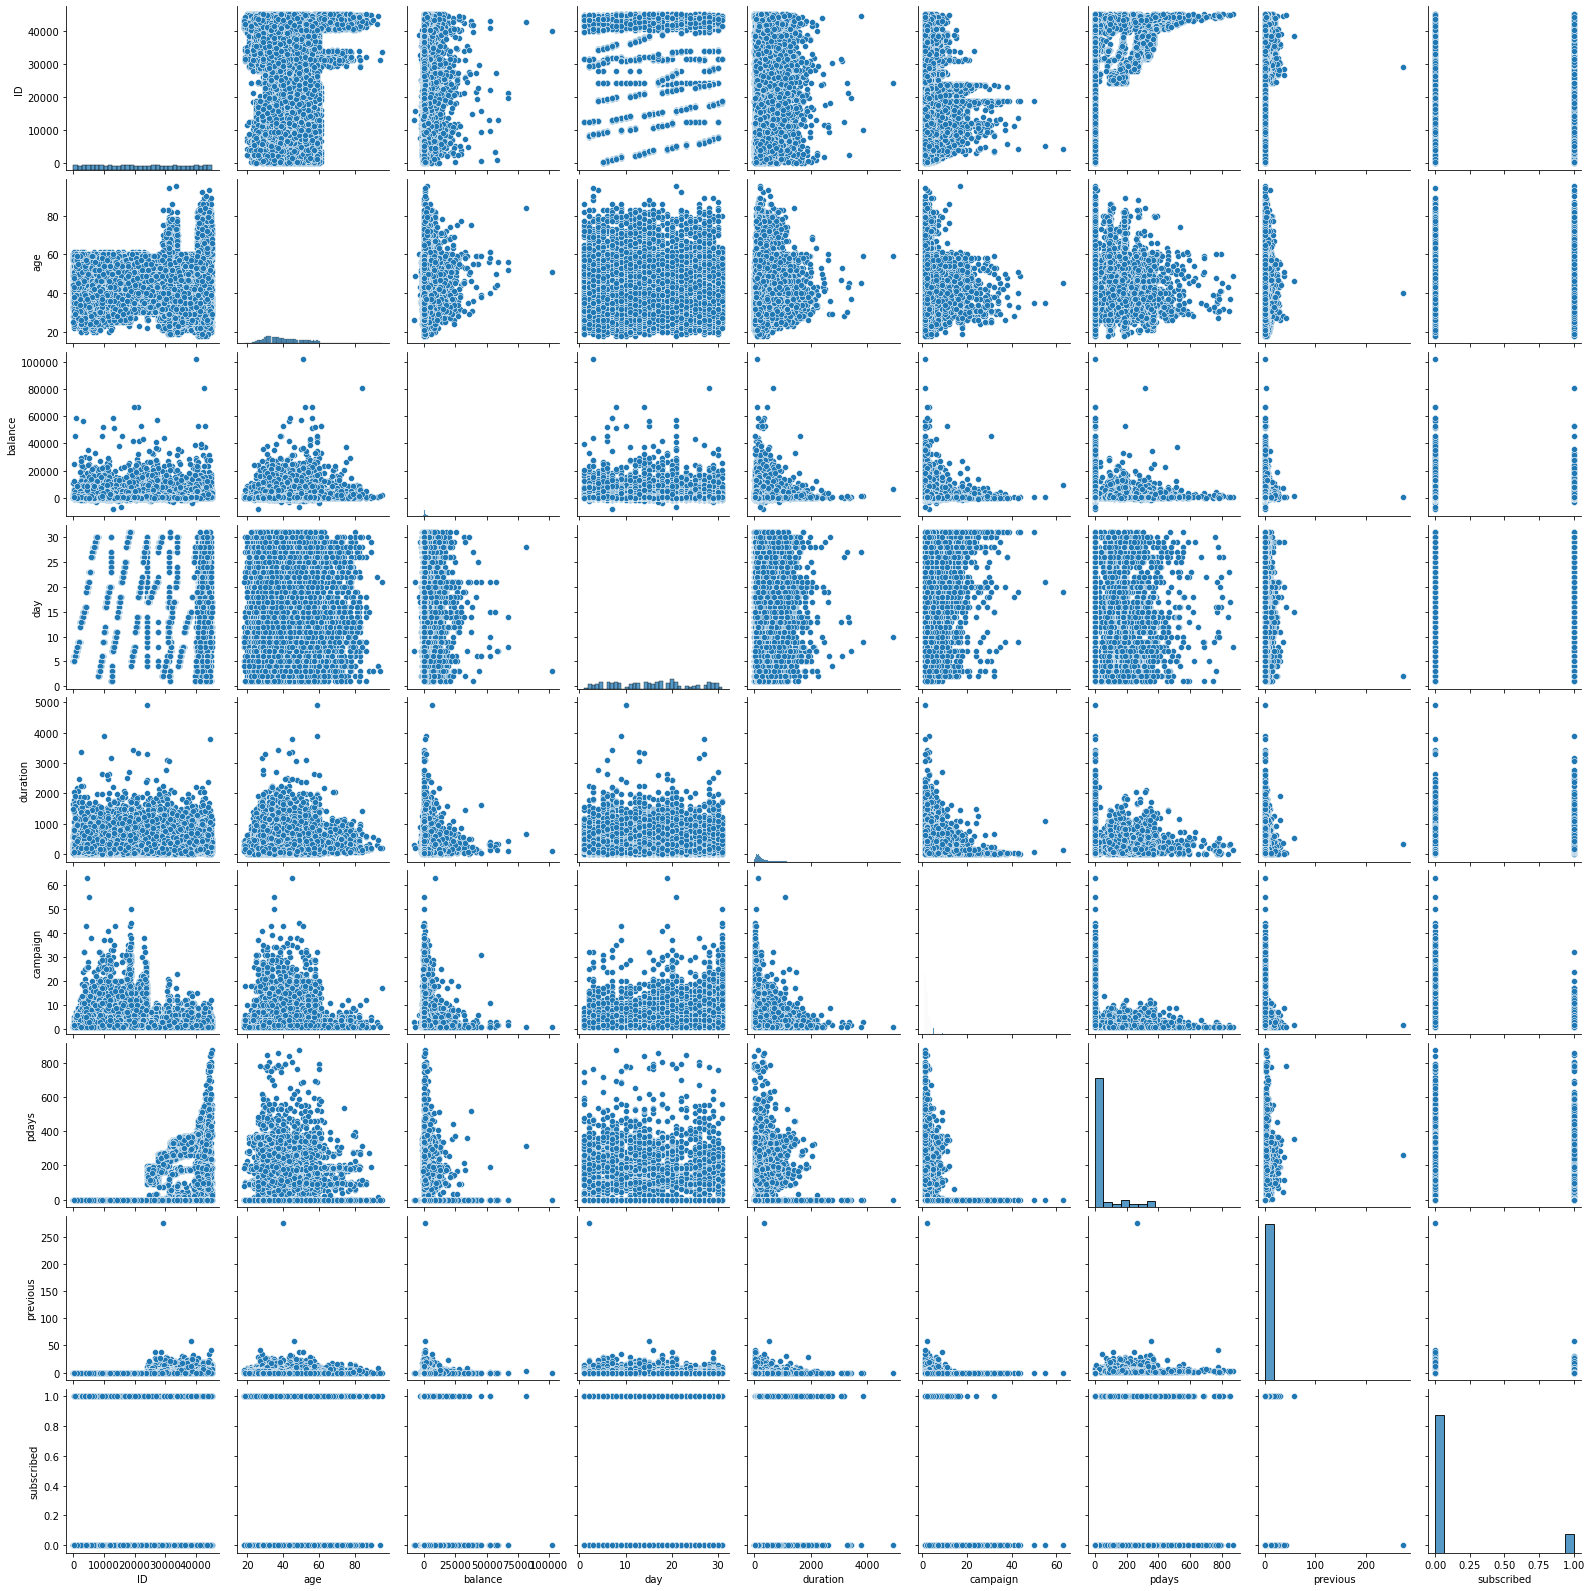

In [60]:
sns.pairplot(train)

# Correlation

In [61]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot:>

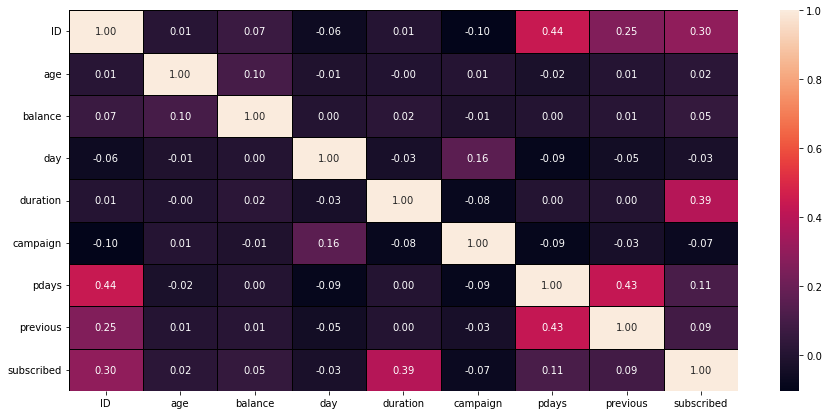

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

Here we can see that Duration of call is highly correlATED to subscitption

In [66]:
train.skew()

ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

<Figure size 1080x720 with 0 Axes>

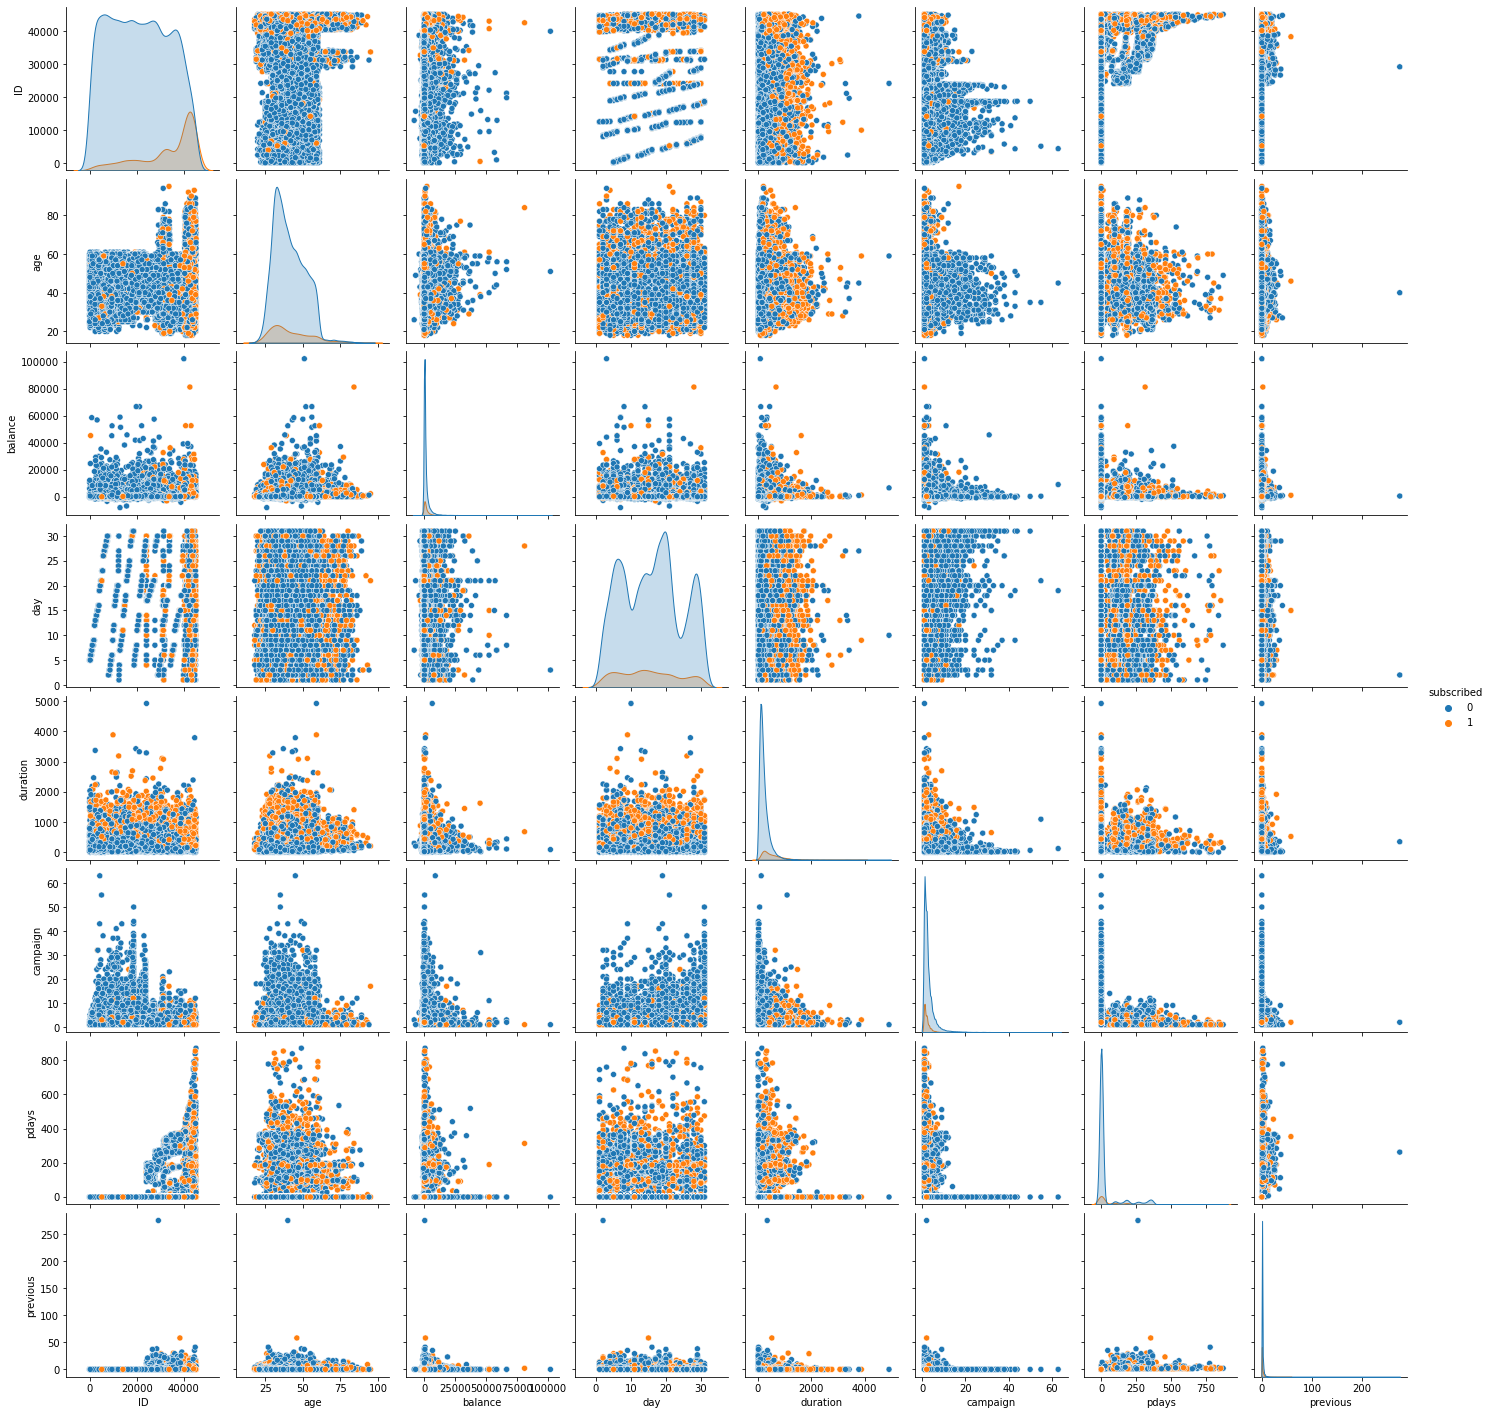

In [68]:
#lets check the subscribed column relation with the other columns with pair plot

plt.figure(figsize=(15,10))
sns.pairplot(data=train,hue="subscribed")

In [69]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


# Checking the outliers

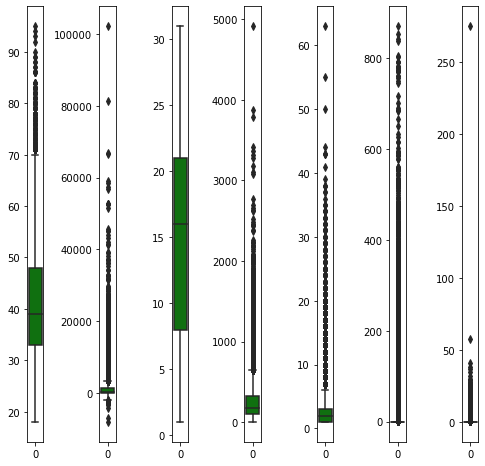

In [84]:
#lists=train.columns.values
lists=["age","balance","day","duration","campaign","pdays","previous"]
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(lists)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=train[lists[i]],color='green',orient='v')
    plt.tight_layout()

Almost all the numerical columns has outliers, except the  day column

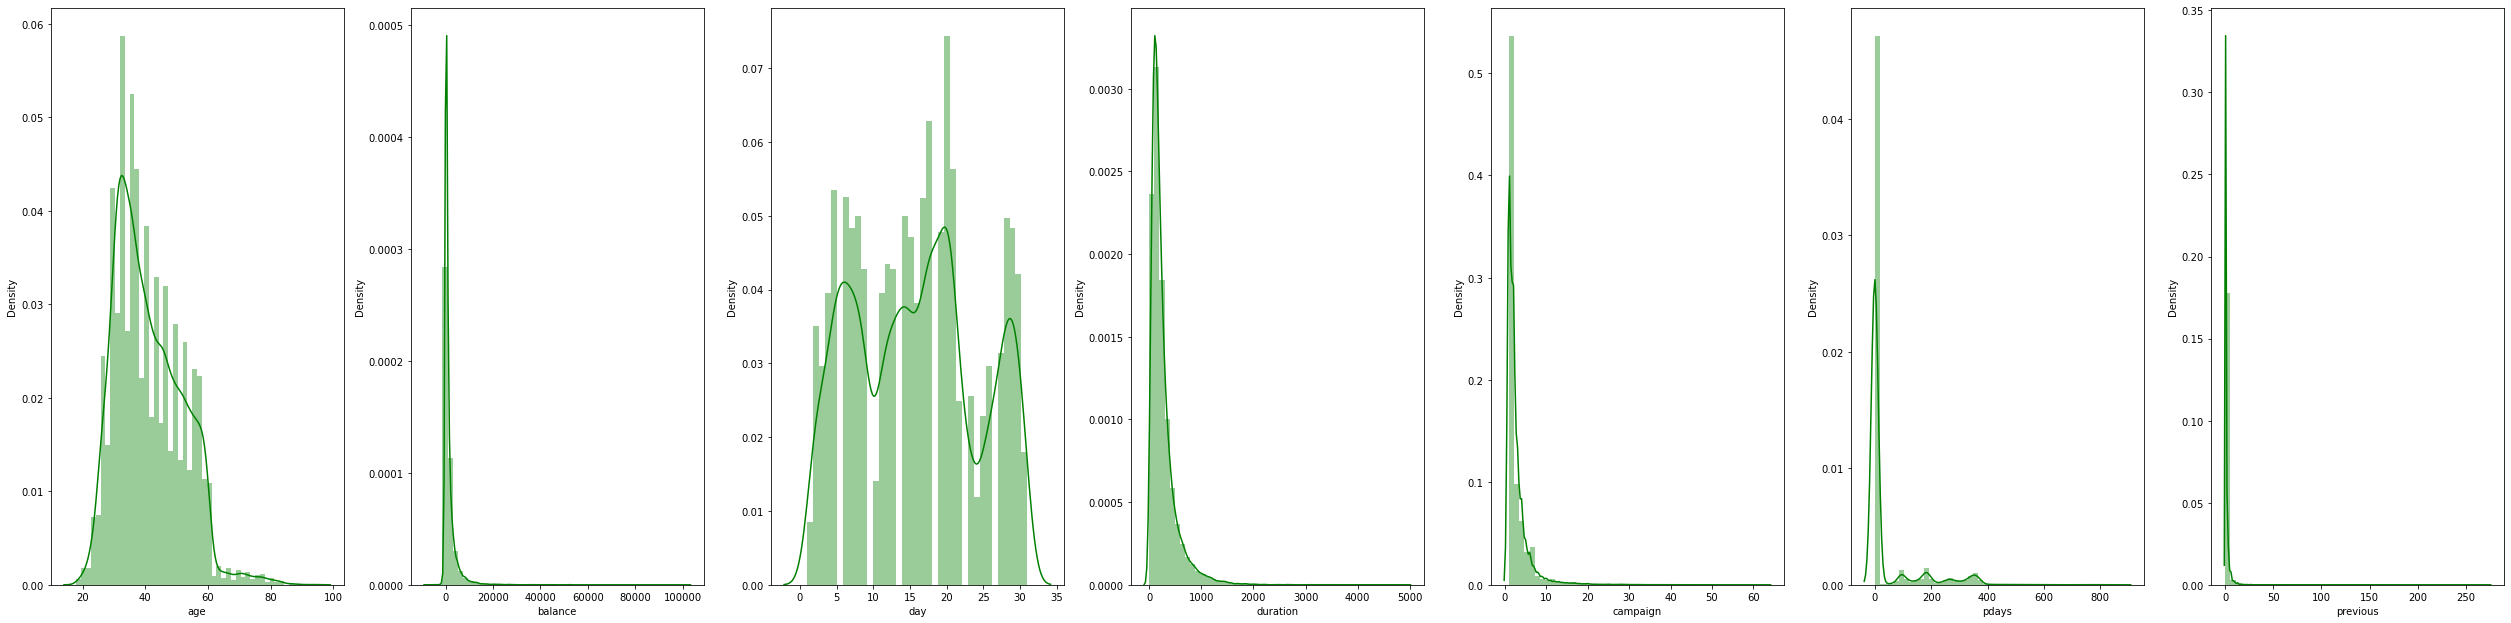

In [92]:
#to check the distribution of the data of each column

lists=["age","balance","day","duration","campaign","pdays","previous"]
ncol=30
nrows=14
plt.figure(figsize=(150,120))
for i in range(0,len(lists)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(train[lists[i]],color='green')
    plt.tight_layout()

In [93]:
train.skew()

ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64

# ZSCORE METHOD

In [102]:
from scipy.stats import zscore
variables=train[["age","balance","day","duration","campaign","pdays","previous"]]
# to get the zscore
z=np.abs(zscore(variables))

In [103]:
z

,age,balance,day,duration,campaign,pdays,previous
0,1.415793,0.187933,0.379579,0.832754,0.245906,0.408555,0.237059
1,0.937156,0.449397,0.499526,0.649957,0.245906,0.408555,0.237059
2,1.313627,0.156159,0.259631,0.070449,0.567059,0.408555,0.237059
3,1.509911,0.635055,0.739422,2.368149,0.567059,0.447299,1.001336
4,0.937156,0.411091,1.419637,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...,...
31642,1.125392,0.450388,0.460055,0.552724,0.245906,0.408555,0.237059
31643,1.133439,0.324903,1.299690,0.699635,0.245906,0.408555,0.237059
31644,0.843038,0.347358,1.059794,0.859979,0.075247,0.408555,0.237059
31645,1.509911,0.376088,0.100212,0.918319,1.359859,2.994723,4.716521


In [104]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
# Creating new dataframe
dfn = train[(z<3).all(axis=1)]
dfn.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
dfn

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,2968,20,30,4,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31641,9476,37,1309,6,442,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [107]:
print("Old DataFrame data in Rows and Column:",train.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",train.shape[0]-dfn.shape[0])

Old DataFrame data in Rows and Column: (31647, 53)
New DataFrame data in Rows and Column: (28124, 53)
Total Dropped rows: 3523


In [108]:
loss_percent=(31647-28124)/31647*100
print(loss_percent,"%")

11.132176825607482 %


# IQR method

In [109]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=train[~((train < (Q1 - 1.5 * IQR)) |(train> (Q3 + 1.5 * IQR))).any(axis=1)]

In [110]:
dfs.shape

(19799, 53)

More than 40% data lost, so we will continue with zscore method

In [111]:
dfn

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,2968,20,30,4,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31641,9476,37,1309,6,442,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


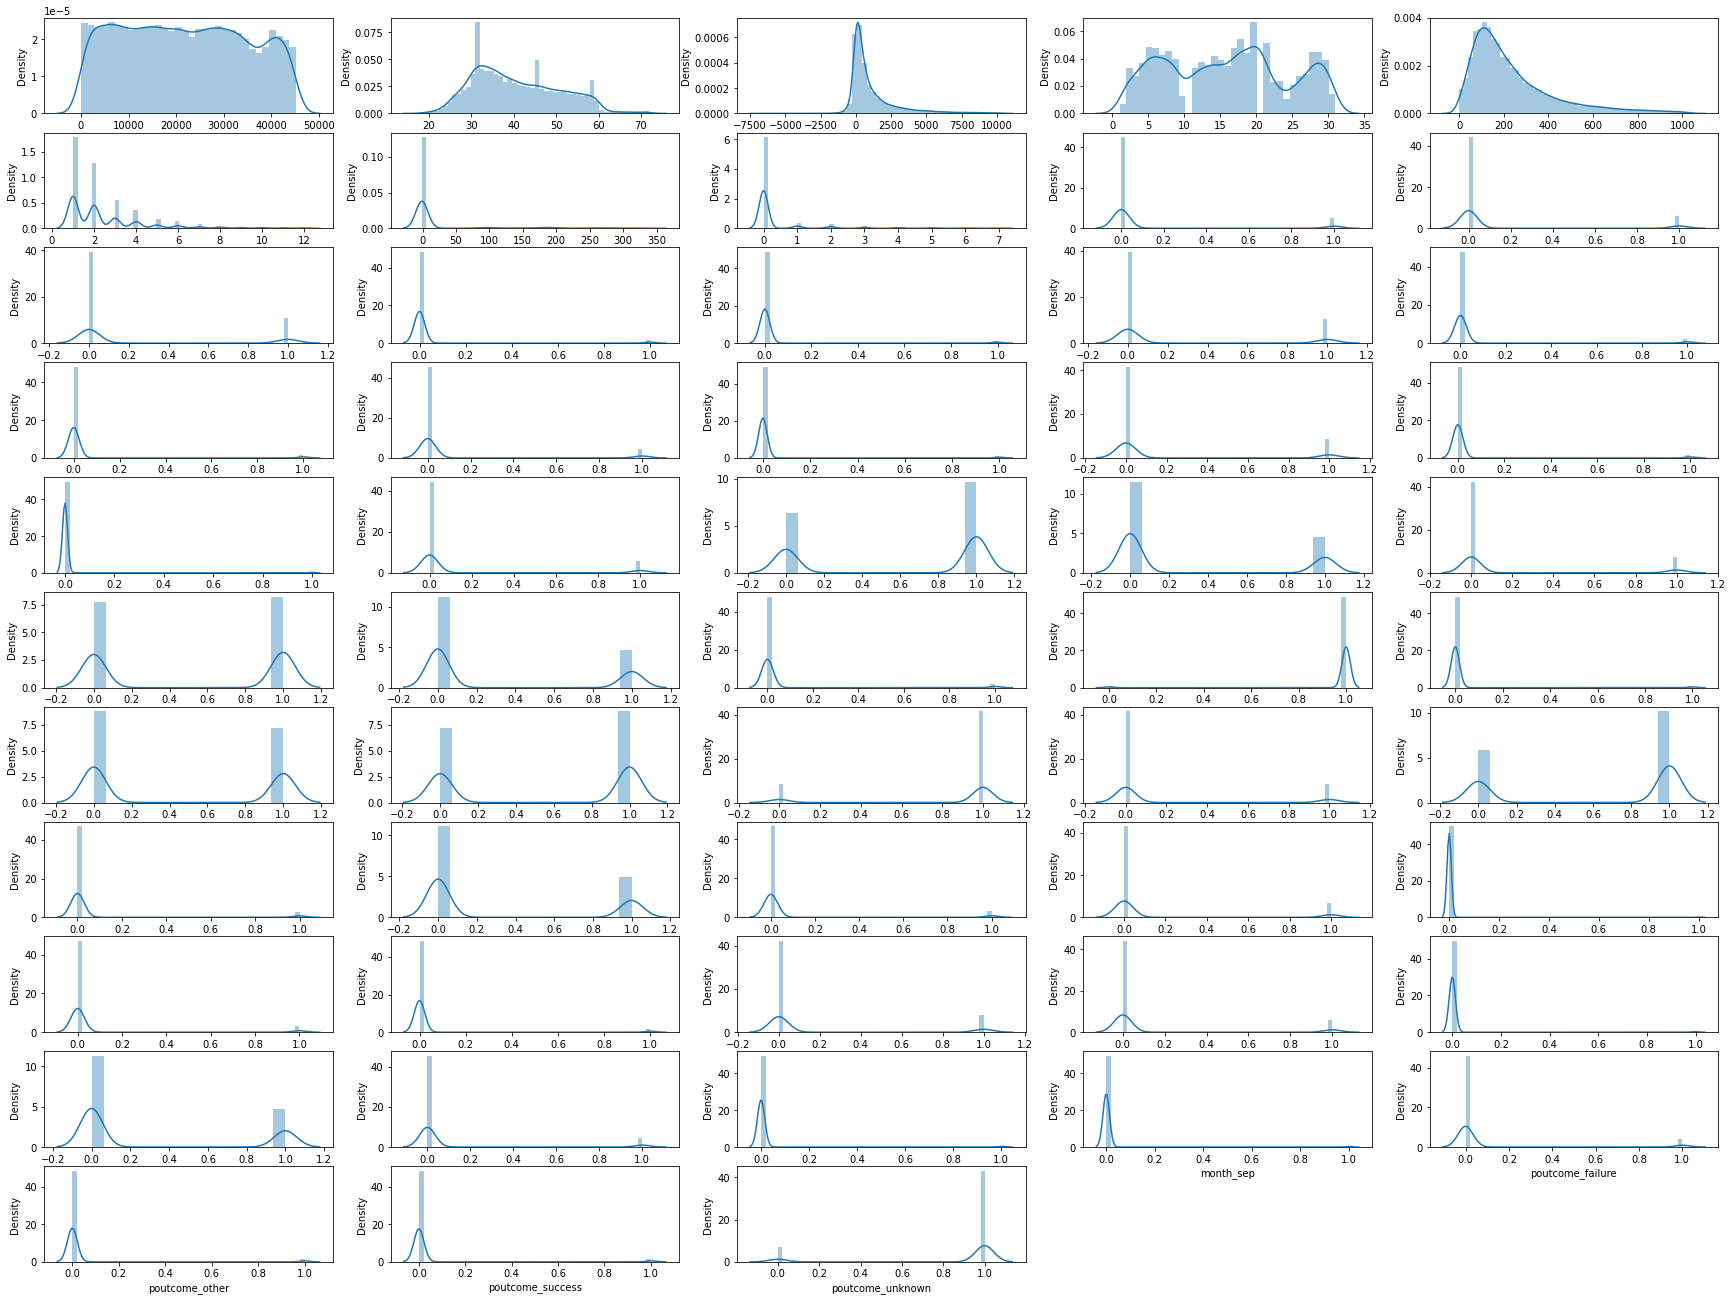

In [117]:
#to check the skewness
plt.figure(figsize=(30,25))
for i in enumerate(dfn.columns):
    plt.subplot(12,5,i[0]+1)
    sns.distplot(dfn[i[1]])

In [118]:
dfn.skew()

ID                      0.079376
age                     0.438496
balance                 2.437605
day                     0.073752
duration                1.596552
campaign                2.059359
pdays                   2.824483
previous                3.691573
subscribed              2.635813
job_admin.              2.412803
job_blue-collar         1.378502
job_entrepreneur        5.263671
job_housemaid           5.716421
job_management          1.424333
job_retired             4.504453
job_self-employed       5.030378
job_services            2.805432
job_student             6.802911
job_technician          1.751799
job_unemployed          5.571433
job_unknown            12.276224
marital_divorced        2.434870
marital_married        -0.429599
marital_single          0.972508
education_primary       1.953719
education_secondary    -0.058911
education_tertiary      0.906145
education_unknown       4.630017
default_no             -7.007588
default_yes             7.007588
housing_no

# Removing skewness using yeo-johnson method

In [119]:
from sklearn.preprocessing  import power_transform

In [120]:
collist=["age","balance","day","duration","campaign","pdays","previous"]
dfn[collist]=power_transform(dfn[collist],method='yeo-johnson')
dfn[collist]

,age,balance,day,duration,campaign,pdays,previous
0,1.418666,0.575980,0.434897,-1.507305,0.170750,-0.402795,-0.402845
1,-0.970338,-0.565648,0.543234,-0.799331,0.170750,-0.402795,-0.402845
2,-1.523056,0.011562,0.324908,0.329891,-1.104918,-0.402795,-0.402845
3,1.490620,1.254324,0.755345,2.214706,-1.104918,2.478026,2.498025
4,-0.970338,-0.470230,-1.504942,0.948600,-1.104918,-0.402795,-0.402845
...,...,...,...,...,...,...,...
31640,0.347593,1.098301,0.543234,-1.837854,1.167351,-0.402795,-0.402845
31641,-0.259091,0.244538,-1.190081,1.165050,0.170750,-0.402795,-0.402845
31642,-1.237471,-0.569243,-0.377369,-0.537575,0.170750,-0.402795,-0.402845
31643,1.194974,-0.294284,-1.343520,1.151842,0.170750,-0.402795,-0.402845


In [121]:
dfn.skew()

ID                      0.079376
age                     0.000044
balance                 0.191870
day                    -0.166178
duration                0.003789
campaign                0.205447
pdays                   2.080726
previous                2.079774
subscribed              2.635813
job_admin.              2.412803
job_blue-collar         1.378502
job_entrepreneur        5.263671
job_housemaid           5.716421
job_management          1.424333
job_retired             4.504453
job_self-employed       5.030378
job_services            2.805432
job_student             6.802911
job_technician          1.751799
job_unemployed          5.571433
job_unknown            12.276224
marital_divorced        2.434870
marital_married        -0.429599
marital_single          0.972508
education_primary       1.953719
education_secondary    -0.058911
education_tertiary      0.906145
education_unknown       4.630017
default_no             -7.007588
default_yes             7.007588
housing_no

# Checking skewness after removal through data visualization using distplot

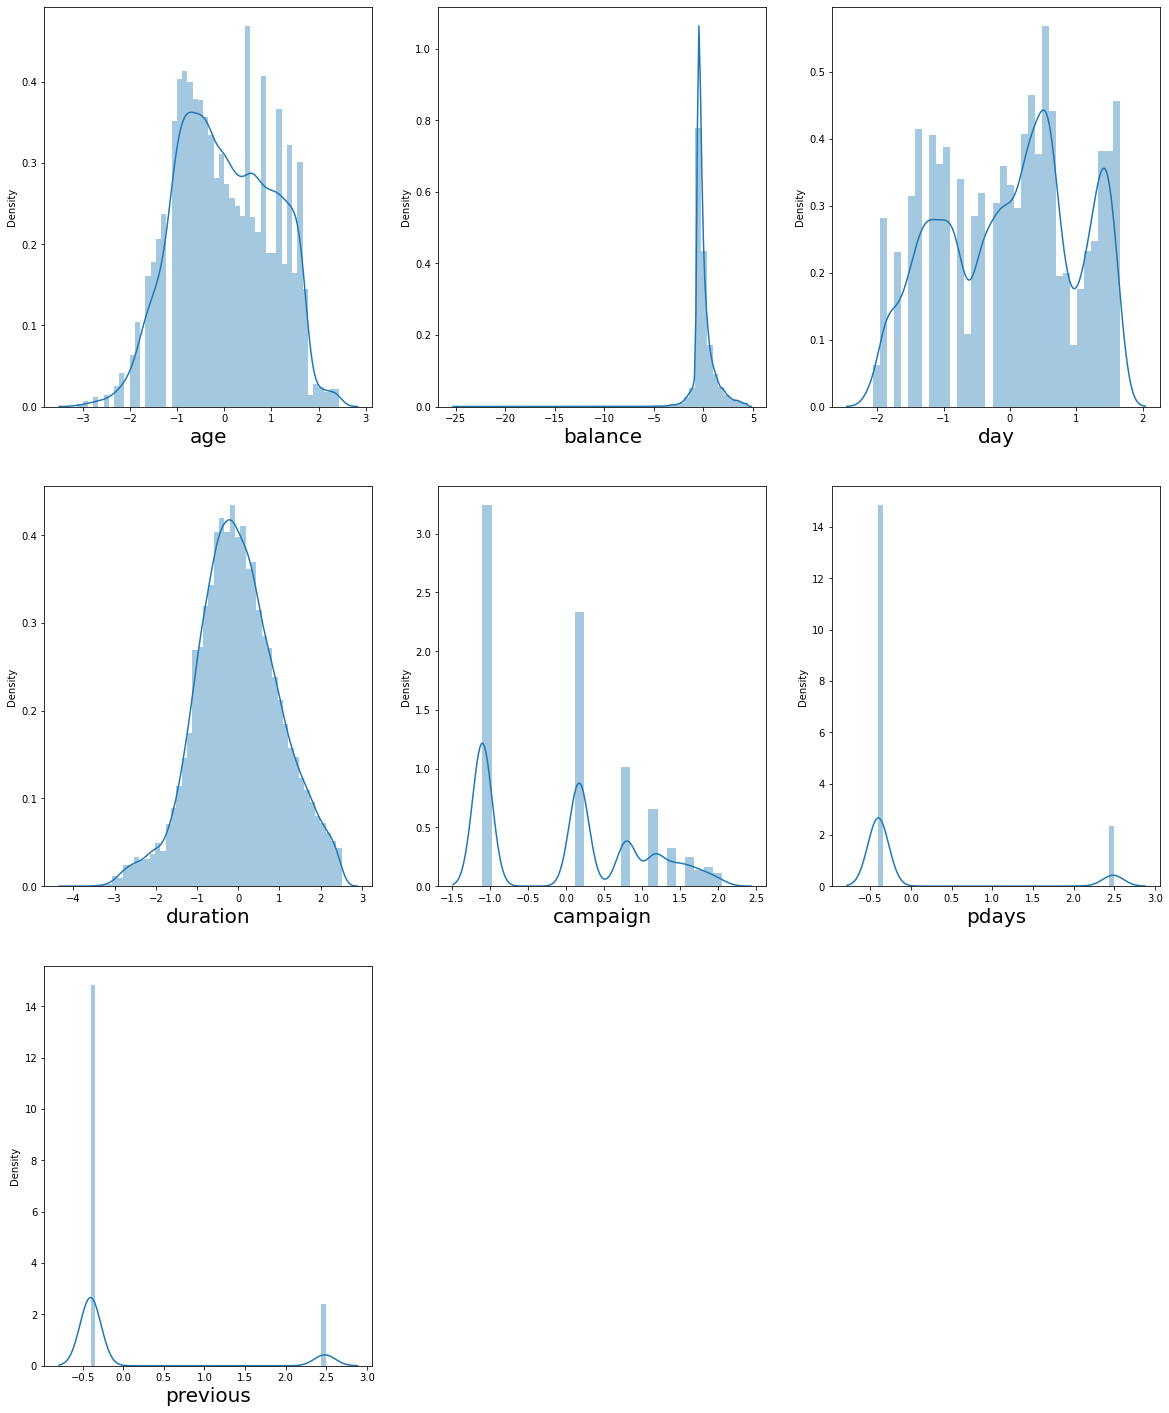

In [122]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dfn[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dfn[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# SCaling the data

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
#dividing the data into inputs and target as X, Y
x=dfn.drop(['subscribed'],axis=1)
y=dfn['subscribed']

In [125]:
x.shape,y.shape

((28124, 52), (28124,))

In [129]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.34151241,  1.41866649,  0.57598031, ..., -0.17187799,
        -0.17546303,  0.40267699],
       [ 1.46195128, -0.9703379 , -0.56564773, ..., -0.17187799,
        -0.17546303,  0.40267699],
       [-0.49420828, -1.52305608,  0.01156179, ..., -0.17187799,
        -0.17546303,  0.40267699],
       ...,
       [ 1.14493508, -1.23747123, -0.56924349, ..., -0.17187799,
        -0.17546303,  0.40267699],
       [ 1.43112488,  1.19497365, -0.29428361, ..., -0.17187799,
        -0.17546303,  0.40267699],
       [-0.15418847, -0.84297459, -0.3380082 , ..., -0.17187799,
        -0.17546303,  0.40267699]])

In [130]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

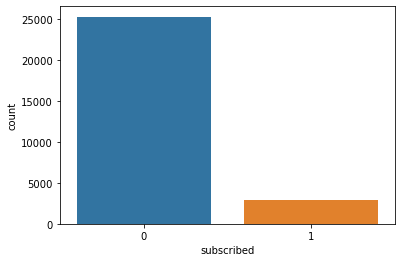

In [131]:
#checking through visualization also
sns.countplot(y)

This is having imbalaced data, so we will use SMOTE technique to resampling

# SMOTE for balacing the data set

In [132]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [133]:
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

Now the data set is balanced

<AxesSubplot:xlabel='subscribed', ylabel='count'>

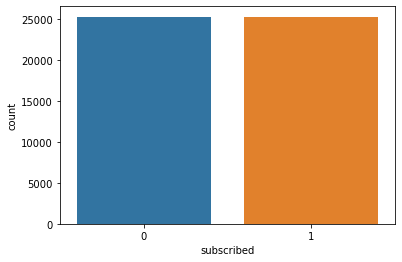

In [134]:
#checking through visualization also
sns.countplot(y)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score

# Splitting the DataSet

In [140]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs very well")
        print("At random state: ",i)
        print("Training Accuracy is: ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy Score is: ",accuracy_score(y_test,pred_test)*100)

At random state 4 the model performs very well
At random state:  4
Training Accuracy is:  87.26188709118796
Testing accuracy Score is:  87.31446665347319
At random state 21 the model performs very well
At random state:  21
Training Accuracy is:  87.30394339715997
Testing accuracy Score is:  87.34415198891747
At random state 44 the model performs very well
At random state:  44
Training Accuracy is:  87.24209588837762
Testing accuracy Score is:  87.18583019988125
At random state 49 the model performs very well
At random state:  49
Training Accuracy is:  87.2470436890802
Testing accuracy Score is:  87.24520087076984
At random state 53 the model performs very well
At random state:  53
Training Accuracy is:  87.38558210875266
Testing accuracy Score is:  87.40352265980606
At random state 60 the model performs very well
At random state:  60
Training Accuracy is:  87.40042551086043
Testing accuracy Score is:  87.40352265980606
At random state 61 the model performs very well
At random state:  6

Taking random state 60

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=60)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49      5102
           1       0.50      0.52      0.51      5004

    accuracy                           0.50     10106
   macro avg       0.50      0.50      0.50     10106
weighted avg       0.50      0.50      0.50     10106



# Cross validation score for Logistic Regression

In [143]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(y_test,pred_lr)
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print("At CV: ",i)
    print("cross validation score is: ",lsc*100)
    print("Accuracy score is: ",lss*100)
    print("\n")

At CV:  2
cross validation score is:  87.21105129829006
Accuracy score is:  87.42331288343557


At CV:  3
cross validation score is:  87.23084343115929
Accuracy score is:  87.42331288343557


At CV:  4
cross validation score is:  87.25657061431285
Accuracy score is:  87.42331288343557


At CV:  5
cross validation score is:  87.23678478685066
Accuracy score is:  87.42331288343557


At CV:  6
cross validation score is:  87.26054553919882
Accuracy score is:  87.42331288343557


At CV:  7
cross validation score is:  87.27440600954974
Accuracy score is:  87.42331288343557


At CV:  8
cross validation score is:  87.27438252058265
Accuracy score is:  87.42331288343557


At CV:  9
cross validation score is:  87.25462348031037
Accuracy score is:  87.42331288343557




Taking CV 7

In [144]:
lsscore_selected= cross_val_score(lr,x,y,cv=7).mean()
print("the CV score is: ",lsscore_selected,"\n The accuracy score is: ",lss)

the CV score is:  0.8727440600954973 
 The accuracy score is:  0.8742331288343558


# Trying More classification techniques

# RAndom Forest Classifier¶

In [145]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC = RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9581436770235504
[[4792  310]
 [ 113 4891]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5102
           1       0.94      0.98      0.96      5004

    accuracy                           0.96     10106
   macro avg       0.96      0.96      0.96     10106
weighted avg       0.96      0.96      0.96     10106



In [146]:
score = cross_val_score(RFC,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_RFC)-score.mean())

[0.92526916 0.96239709 0.96635529 0.96532616]
0.9548369221025966
Difference between cross val score and accuracy is :  0.0033067549209537805


# Support Vector Machine

In [152]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.9266772214526025
[[4511  591]
 [ 150 4854]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      5102
           1       0.89      0.97      0.93      5004

    accuracy                           0.93     10106
   macro avg       0.93      0.93      0.93     10106
weighted avg       0.93      0.93      0.93     10106



In [153]:
score = cross_val_score(svc,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_svc)-score.mean())

KeyboardInterrupt: 

# GradientBoostingClassifier

In [150]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.9255887591529784
[[4592  510]
 [ 242 4762]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5102
           1       0.90      0.95      0.93      5004

    accuracy                           0.93     10106
   macro avg       0.93      0.93      0.93     10106
weighted avg       0.93      0.93      0.93     10106



In [151]:
score = cross_val_score(GB,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between cross val score and accuracy is : ",accuracy_score(y_test,pred_GB)-score.mean())

[0.8868746  0.93176061 0.93500633 0.93239392]
0.9215088663711211
Difference between cross val score and accuracy is :  0.004079892781857386


# Hyper Parameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [156]:
RFC = RandomForestClassifier()
parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,refit=True,verbose=2)
gcv.fit(x_train,y_train)
gcv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   1.7s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   1.8s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   1.6s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   1.6s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   1.6s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   1.6s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   1.5s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   1.5s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   1.4s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   1.5s
[CV] END .....criterion=gini, max_depth=4, max_features=log2; total time=   1.1s
[CV] END .....criterion=gini, max_depth=4, max_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [157]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9157925984563625

# ROC-AUC Curve

In [158]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test,gcv_pred)
auc = roc_auc_score(y_test,gcv_pred)

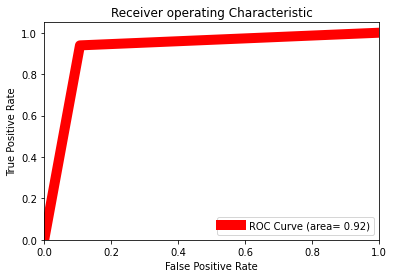

In [159]:
plt.figure()
plt.plot(fpr,tpr,color="red",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving the Model

In [160]:
import joblib
joblib.dump(gcv.best_estimator_,'Deposit.obj')

['Deposit.obj']

In [161]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [162]:
gcv_pred=gcv.best_estimator_.predict(test)


In [163]:
gcv_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
submissions = pd.DataFrame()

In [166]:
submissions['ID'] = test['ID']
submissions['subscribed'] = gcv_pred

In [167]:
submissions['subscribed']

0        1
1        1
2        1
3        1
4        1
        ..
13559    1
13560    1
13561    1
13562    1
13563    1
Name: subscribed, Length: 13564, dtype: int64

# Loading the saved Model

In [170]:
import joblib
Loaded_Model = joblib.load(open('Deposit.obj','rb'))
result = Loaded_Model.score(x_test,y_test)
print(result*100)

91.57925984563626


In [171]:
conclusion = pd.DataFrame([Loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105
Predicted,1,0,0,0,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
Original,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
